# K Nearest Neighbours
Given a data point:

* Calculate its distance from all other data points in the dataset
* Get the closest k number of points
* In regression, we will get the average of these points' values
* In classification, we get the label of the data point based on the majority vote of the neighbour's labels.

So for each value in the dataset we will find the closest values measured by Euclidean distance and assign a label to it by counting the labels of these neighbours and assigning the highest occurring label as that points label.

## The IRIS dataset
The Iris dataset consists of 3 types of irises (Setosa, Versicolour and Virginica) petal and sepal length, stored in a 150 x 4 ndarray.

Each row is a sample with the columns being Sepal Length, Sepal Width, Petal Length and Petal Width.

In the graph below we use the column 2 and 3 which are the Petal Lengths and Petal Widths to create a scatter plot X and Y.

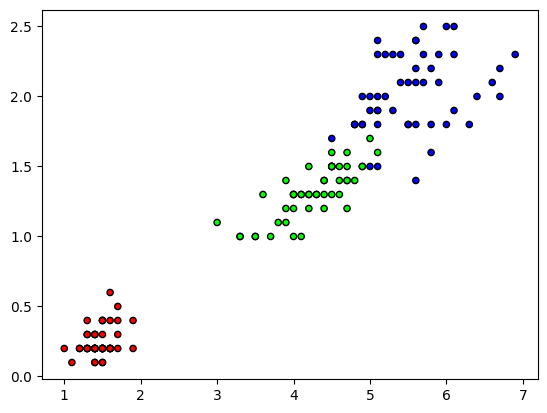

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris  = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

## Computing distances
We use the Euclidean distance to compute the distances of all the points to our target point.

Euclidean distance is the shortest between 2 points irrespective of the dimension. There are several ways in Python to calculate it, we will use the square root of the sum of the squares.

np.linalg.norm() can also be used

In [3]:

def euclidean_distance(x1, x2):
    # distance = np.linalg.norm(x1, x2)
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance



## Computing the closest K points
np.argsort returns the INDICES of an array that has been sorted for example.


In [55]:
import numpy as np
x = np.array([3,1,2])
np.argsort(x)

array([1, 2, 0], dtype=int64)

In [57]:
for x in X_test[0]:
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    print(distances)


[6.96921803361037, 5.574943945906542, 8.040522371090077, 5.752390807307862, 5.526300751859239, 7.837729262994479, 8.368392916205595, 7.870832230456954, 8.325863318599458, 7.035623639735144, 8.060397012554654, 6.240192304729077, 7.87210264160726, 5.0079936102195655, 5.30282943342514, 8.221921916437786, 5.06655701635736, 5.021951811795888, 5.158488150611572, 4.827007354458868, 8.24317899842045, 5.2335456432518095, 5.301886456724624, 6.04400529450463, 6.998571282769076, 6.307138812488591, 5.794825277780167, 5.6780278266313555, 5.981638571495273, 7.968061244744545, 8.016233529532432, 5.4972720507539, 5.5803225713214815, 5.136146415358502, 7.772387020729217, 7.801922839915811, 8.04114419718985, 5.6435804238089835, 6.755738301621814, 5.881326381013044, 4.617358552246078, 6.053924347066125, 8.022468448052631, 5.470831746635971, 7.887965517166006, 5.042816673249187, 7.529940238806679, 5.828378848359121, 6.074537019394976, 7.561745830163825, 6.45445582524197, 8.02932126645833, 4.714870093650513

The array itself was sorted from lowest to highest [1,2,3] but the index of each value was returned and not the value itself [1,2,0].

When we perform the np.argsort on the distances we get the closest distance at index 67.

In [58]:
np.argsort(distances)

array([ 67,   6,  78, 118,  97, 119,  69,  96,  94, 113,  20, 101,   8,
        15,  24,   5,   9,   0,  85, 111,  57, 114,  51,   2, 102,  30,
        42,  29,  36,  81,  34,  95,  61,  82,  72,   7,  10,  44,  84,
        68,  89,  49,  12, 106, 117,  25,  71, 107,  56,  35,  60,  48,
        88,  70,  50,  46,  77,  38,  74,  26,  41,  86,  87,  32,  47,
        11,  23,  79,  80,  55,  76,  73,  64,  54,  16,  59,  58,   1,
       105,  66,  37,  65,  99,  28,   3,  93,  39,  62,  43, 103,  33,
        21,   4,  52,  91,  75, 100,  53,  27, 104, 116,  17,  98,  13,
        63, 108,  19,  83, 112,  40, 109, 115,  92,  14,  31,  90,  18,
        22, 110,  45], dtype=int64)

But we want to the k-number of values closest to the out x. (k=5)

In [59]:
np.argsort(distances)[:5]

array([ 67,   6,  78, 118,  97], dtype=int64)

### Find the labels using these indices
We can now look inside y_train to see what these labels are

In [64]:
indices = np.argsort(distances)[:5]
k_nearest = []
for index in indices:
    k_nearest.append(y_train[index])


These are the five nearest labels for our datapoint.

### Count the labels to vote
We now count the labels to see which of the labels are the most common. We can then assign our x value that label


In [65]:
from collections import Counter
Counter(k_nearest).most_common()

[(0, 5)]

Since we want the label only [0] and not the count [1]

In [67]:
Counter(k_nearest).most_common()[0][0]

0

In [18]:

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions


    def _predict(self, x):
        # compute the distances all the points in the dataset from our target point
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k values using np.argsort
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # label by majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]



In the graph we sliced the columns for petal length [:,2] and petal width [:,3] as our X and Y values for the graph. Therefore, the graph is petal length versus petal width

In [20]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


In [21]:
accuracy = np.sum(predictions == y_test) / len(y_test)

In [22]:
accuracy

0.9666666666666667

The KNN classification works with an accuracy of 96.7%. But what is it actually doing.



In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Each row is labeled with the Iris type 0, 1 and 2.

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We use the Iris dataset as a basic dataset to test out our machine learning algorithms such as KNNs.

In [29]:
X[:,2] # slices the petal length column

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [31]:
X[:,3] # slices the petal width column

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [54]:
x = np.array([3,1,2])
np.argsort(x)

array([1, 2, 0], dtype=int64)